# Polynomial Regression

### Import the Datasets and Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
data = pd.read_csv('Position_Salaries.csv')

In [27]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Set data to Independent variables (Matrix of features) and dependate variable

In [4]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [5]:
data.isnull().values.any()

False

### It has no missing data and it is a very small sample that does not require we split them to training and test sets

### It also does not require Encoding of Categorical Data

## Implementing Linear Regression to check for Linear relationships

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [7]:
np.set_printoptions(precision=2)

In [8]:
y_pred = lr.predict(x)

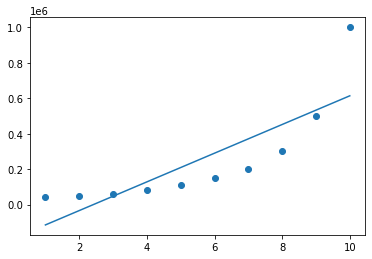

In [9]:
plt.scatter(x, y)
plt.plot(x, y_pred)

### The Above Visualization has shown that this dataset does not have linear relationship

In [10]:
# from sklear.linear_model import LinearRegression
# from sklear.preporocessing import PolynomialFeatures
# reg = PolynomialFeatures(degree=3)
# poly_x = reg.fit_transform(x)
# l_reg = LinearRegression()
# ploy_reg = l_reg.fit(poly_x, y)

### Implementing a Non Linear Model

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
linear_reg2 = LinearRegression()
PR = linear_reg2.fit(x_poly, y)

In [12]:
y_poly_pred = PR.predict(x_poly)

In [13]:
y_poly_pred

array([ 53356.64,  31759.91,  58642.19,  94632.87, 121724.94, 143275.06,
       184003.5 , 289994.17, 528694.64, 988916.08])

### Justifying the importance of implementing a non linear model on specific datasets as seen in the previous curve and this curve

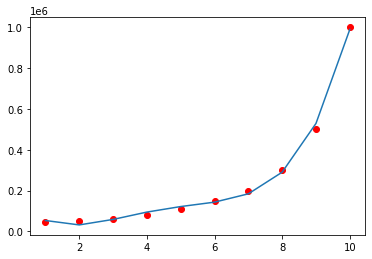

In [14]:
plt.scatter(x, y, color = 'red')
plt.plot(x, y_poly_pred)

### For a smoother and better curve

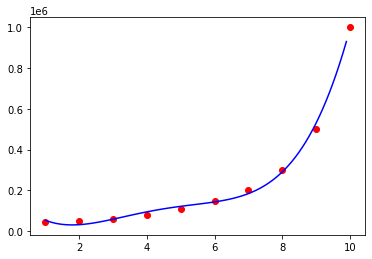

In [15]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, PR.predict(poly_reg.fit_transform(x_grid)), color = 'blue')

### Predicting for an independent variable value of 7

In [25]:
lr.predict([[7]])

array([370818.18])

In [18]:
PR.predict(poly_reg.fit_transform([[7]]))

array([184003.5])

In [22]:
print("The real Salary for a level 7 is", y[6])

The real Salary for a level 7 is 200000


### Calculating our R Score

In [24]:
from sklearn.metrics import r2_score
r2_score(y, y_poly_pred)

0.9973922891706614